# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Underfit Model

###Build the "Underfit" model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 4
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5481 - acc: 0.8061 - val_loss: 0.4308 - val_acc: 0.8438
Epoch 2/4
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4205 - acc: 0.8472 - val_loss: 0.4015 - val_acc: 0.8554
Epoch 3/4
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3873 - acc: 0.8575 - val_loss: 0.3936 - val_acc: 0.8542
Epoch 4/4
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3643 - acc: 0.8661 - val_loss: 0.3674 - val_acc: 0.8680


###Evaluate "Underfit" accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3674 - acc: 0.8680
Test accuracy: 0.868


###"Underfit" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

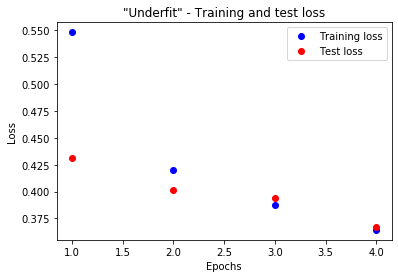

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Underfit\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

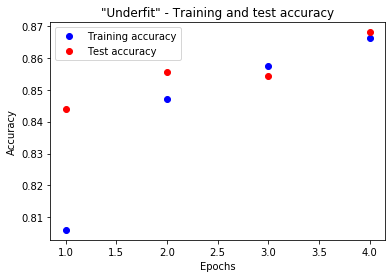

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Underfit\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Overfit Model

### Build the "Overfit" model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4981 - acc: 0.8250 - val_loss: 0.4361 - val_acc: 0.8425
Epoch 2/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3766 - acc: 0.8640 - val_loss: 0.3903 - val_acc: 0.8632
Epoch 3/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3377 - acc: 0.8775 - val_loss: 0.3738 - val_acc: 0.8616
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3124 - acc: 0.8866 - val_loss: 0.3621 - val_acc: 0.8695
Epoch 5/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2962 - acc: 0.8908 - val_loss: 0.3555 - val_acc: 0.8720
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2806 - acc: 0.8961 - val_loss: 0.3511 - val_acc: 0.8776
Epoch 7/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2667 - acc: 0.9009 - val_loss: 0.

### Evaluate "Overfit" accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3655 - acc: 0.8875
Test accuracy: 0.8875


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



### "Overfit" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

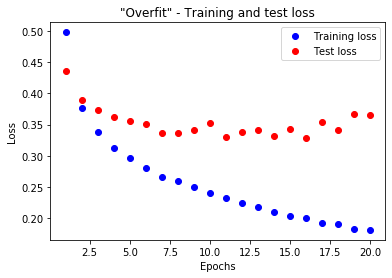

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Overfit\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

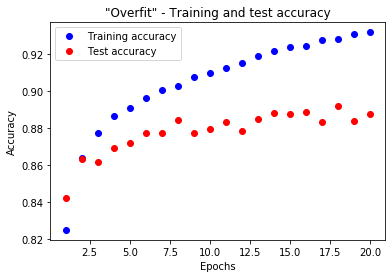

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Overfit\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##"Just Right" Model

### Build the "Just Right" model

In [0]:
# set up the layers

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))


# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
batch_size = 64
history = model.fit(train_images, 
                      train_labels, 
                      batch_size = batch_size,                    
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6716 - acc: 0.7589 - val_loss: 0.4495 - val_acc: 0.8410
Epoch 2/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4901 - acc: 0.8247 - val_loss: 0.4313 - val_acc: 0.8421
Epoch 3/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4507 - acc: 0.8380 - val_loss: 0.3975 - val_acc: 0.8549
Epoch 4/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4312 - acc: 0.8440 - val_loss: 0.3909 - val_acc: 0.8572
Epoch 5/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4170 - acc: 0.8503 - val_loss: 0.3768 - val_acc: 0.8622
Epoch 6/15
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3998 - acc: 0.8548 - val_loss: 0.3709 - val_acc: 0.8660
Epoch 7/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3954 - acc: 0.8558 - val_l

### Evaluate "Just Right" accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3420 - acc: 0.8777
Test accuracy: 0.8777


### "Just Right" Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

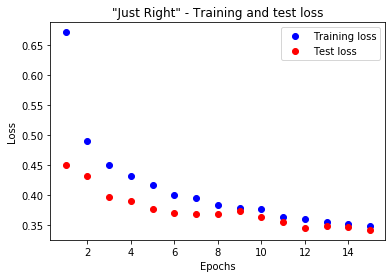

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('\"Just Right\" - Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

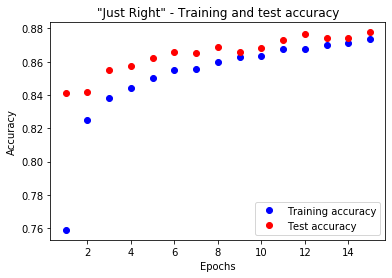

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('\"Just Right\" - Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()